<a href="https://colab.research.google.com/github/JonMaycon/DataScience/blob/main/ML_Personalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

In [2]:
# Carregando Dados
data = pd.read_csv('data-final.csv', sep='\t')

In [3]:
# Visualizando dados
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0


In [4]:
# Filtrando dados relevantes para análise
data.drop(data.columns[50:110], axis=1, inplace=True)

In [5]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [6]:
# Análise Estatística
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.00000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000
mean,2.648931,2.765128,3.330856,3.142410,3.297861,2.434142,2.796296,3.422535,2.967397,3.571075,3.306338,3.180230,3.857851,2.685446,2.891628,2.874804,3.067553,2.690793,3.116197,2.751043,2.248696,3.881064,2.275952,3.949922,2.24048,3.749218,2.173970,3.690662,3.803599,3.571596,3.273213,2.928665,3.961398,2.618675,2.598983,2.833985,3.673318,2.501435,3.201617,3.560120,3.626190,2.158341,3.950437,2.100300,3.731186,1.940133,3.946133,3.132255,4.049302,3.881570
std,1.255894,1.337522,1.205808,1.236825,1.272441,1.234780,1.379186,1.265622,1.347715,1.298345,1.324657,1.189435,1.140516,1.250397,1.255272,1.323495,1.265726,1.328023,1.277443,1.311413,1.336973,1.104996,1.268458,1.094395,1.14960,1.194240,1.096369,1.074519,1.129320,1.070716,1.184143,1.368656,1.031813,1.234742,1.270399,1.405038,1.134761,1.134550,1.265895,1.037404,1.130805,1.112611,1.097228,1.095128,0.984684,1.112714,0.997306,1.245178,1.035967,1.028074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.00000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.00000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,3.000000,5.000000,3.00000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,4.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0

In [7]:
# Tratando ruídos encontrados na Análise Estatística
data['EXT1'].value_counts()

3    2276
1    1906
4    1479
2    1411
5     568
0      28
Name: EXT1, dtype: int64

In [8]:
# Exclusão de valores '0'. As respostas varias no intervalo de 1 e 5
data = data[(data > 0.00). all(axis=1)]

In [9]:
data['EXT1'].value_counts()

3    1937
1    1614
4    1272
2    1242
5     469
Name: EXT1, dtype: int64

Definição de clusters: buscando agrupar respostas similares
Técnica de Agrupamento consiste em primeiro: Qual nº de Grupos quero agrupar?



In [10]:
#Utilização do Método Elbor
!pip install yellowbrick

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [12]:
#Instanciando KMeans e KE (com número de K/Gp que quero testar)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [13]:
#Selecionando uma amostra de dados:
data_sample = data.sample(n=5000, random_state=1)

Executando o Teste - Método Elbow


In [21]:
# O metodo Elbow ´w uma das formas de definir o númeto de cluster em ML

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

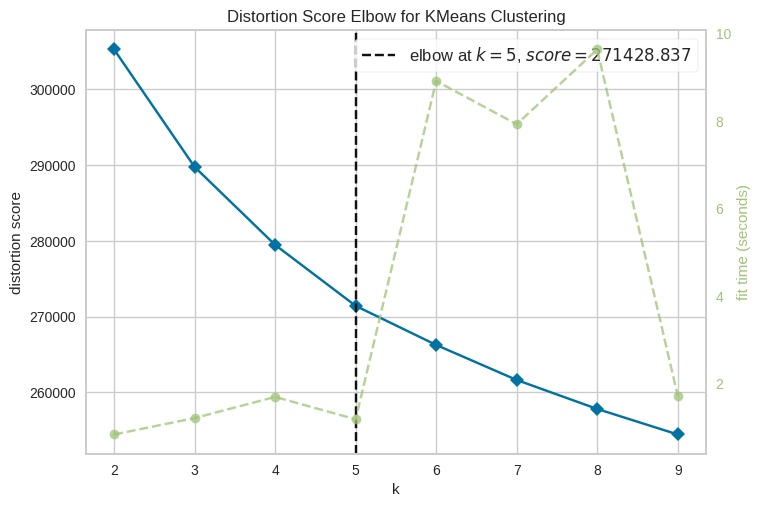

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
visualizer.fit(data_sample)
visualizer.poof()

In [15]:
# Agrupando o número de participantes em 5 Grupos
# Com atribuição de registros aos devidos grupos

In [16]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#Inserção de rótulos no dataframe
predicoes = k_fit.labels_
data['Clusters'] = predicoes

In [18]:
#Verificando os dados:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,0
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,0
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,4
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


In [19]:
#Analisando os Grupos
data['Clusters'].value_counts()

1    1408
0    1356
2    1345
3    1310
4    1115
Name: Clusters, dtype: int64

In [20]:
#Realizando agrupamento por grupo
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.227876,3.144543,3.255900,3.563422,3.122419,2.597345,2.364307,3.925516,2.418879,4.056047,3.575959,3.064897,4.173304,2.671091,2.931416,2.927729,2.946165,2.482301,3.066372,2.580383,1.857670,4.050147,1.660767,4.370944,1.968289,4.205015,1.943215,4.005162,4.189528,3.679204,3.853245,2.138643,4.275074,1.946903,3.308997,2.010324,4.177729,2.025074,3.892330,3.864307,3.446903,2.289823,3.824484,2.179204,3.649705,2.023599,3.915192,2.779499,4.146755,3.678466
1,3.392756,1.972301,3.762074,2.539773,4.022017,1.906250,3.596591,2.838068,3.718750,3.110085,3.872159,2.947443,4.275568,2.389915,3.310369,3.541903,3.802557,3.478693,3.734375,3.247159,2.125710,4.269886,2.788352,4.156250,2.015625,3.946733,1.905540,3.850142,4.093040,3.833097,2.889915,3.693182,3.858665,3.317472,2.107244,3.605114,3.384233,2.859375,2.888494,3.444602,3.862926,2.166193,4.259943,2.009943,3.911932,1.785511,4.002841,3.501420,4.124290,4.152699
2,3.516729,1.810409,4.407435,2.179926,4.344238,1.629740,3.956877,2.737546,3.802230,2.455019,2.424535,3.800743,3.194052,3.332342,2.231227,1.985130,2.194052,1.756877,2.218587,1.709294,1.862454,4.543494,1.765056,4.323420,1.765799,3.976952,1.539777,4.139777,4.181413,4.208178,3.704089,2.677323,4.149442,1.954647,3.104833,2.356134,3.826022,1.996283,3.551673,3.866914,3.868401,1.857249,4.071375,1.888476,4.109294,1.655762,4.281041,3.229740,4.049814,4.265428
3,1.719847,3.785496,2.245802,4.156489,2.266412,3.336641,1.690840,4.154962,2.144275,4.541985,4.212977,2.532061,4.492366,2.170992,3.516794,3.837405,3.903817,3.632061,3.957252,3.931298,2.487023,3.376336,2.622137,3.793893,2.600000,3.774046,2.742748,3.391603,3.593130,2.954962,2.874809,3.275573,3.797710,3.445802,2.083206,3.392366,3.583969,3.078626,2.828244,3.312214,3.498473,2.412214,3.981679,2.233588,3.388550,2.197710,3.667176,3.163359,4.235878,3.624427
4,2.296861,3.335426,2.973094,3.498655,2.699552,2.879821,2.307623,3.632287,2.808969,3.925561,2.437668,3.827803,3.113901,3.112108,2.421525,2.049327,2.389238,1.976682,2.585650,2.296861,3.046637,3.191928,2.606278,3.050224,3.104036,2.812556,2.965919,3.069955,2.860090,3.206278,3.270852,2.936323,3.805381,2.514798,2.404484,2.826906,3.549776,2.634978,2.905830,3.492377,3.629596,2.096861,3.701345,2.255605,3.700448,2.132735,4.043946,3.165919,3.756054,3.734529


In [27]:
#Calculando média de cada grupo para verificar padrões:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]


In [28]:
#Somando os valores de cada grupo
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

In [30]:
#Valor médio por grupo
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.067625,3.041962,3.192994,3.149263,3.193363
1,3.085866,3.460014,3.298437,3.204830,3.377770
2,3.084015,2.484684,3.230632,3.118736,3.327658
3,3.004275,3.618702,3.133588,3.167252,3.240305
4,3.035785,2.621076,2.991390,3.034170,3.221704


In [31]:
#plot de média por gruppo:
data_clusters = data_soma.groupby('clusters').mean()

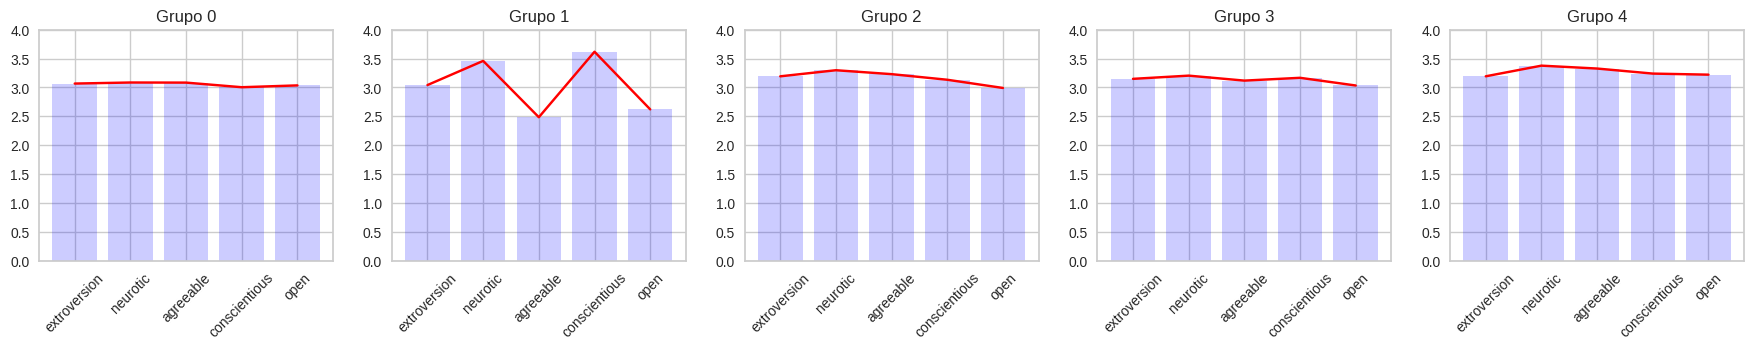

In [42]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='blue', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [36]:
#Criando uma planilha para entrar com os dados
data[:0].to_excel("perguntas.xlsx",index=False)

In [38]:
#Recuperando os dados
meus_dados = pd.read_excel('perguntas.xlsx')

In [43]:
#Passando meus dados para o modelo
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)

ValueError: ignored